In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('qm9_new.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mol_id  20000 non-null  object 
 1   smiles  20000 non-null  object 
 2   A       20000 non-null  float64
 3   B       20000 non-null  float64
 4   C       20000 non-null  float64
 5   mu      20000 non-null  float64
 6   alpha   20000 non-null  float64
 7   homo    20000 non-null  float64
 8   lumo    20000 non-null  float64
 9   gap     20000 non-null  float64
 10  r2      20000 non-null  float64
 11  zpve    20000 non-null  float64
 12  u0      20000 non-null  float64
 13  u298    20000 non-null  float64
 14  h298    20000 non-null  float64
 15  g298    20000 non-null  float64
 16  cv      20000 non-null  float64
dtypes: float64(15), object(2)
memory usage: 2.6+ MB


избавимся от дубликатов

In [4]:
df_drop = df.drop_duplicates(subset=['smiles', 'gap'], keep='first')

In [5]:
len(df_drop)

19998

In [6]:
df_drop.duplicated(subset=['smiles']).sum()

0

Работа с таргет парамтром

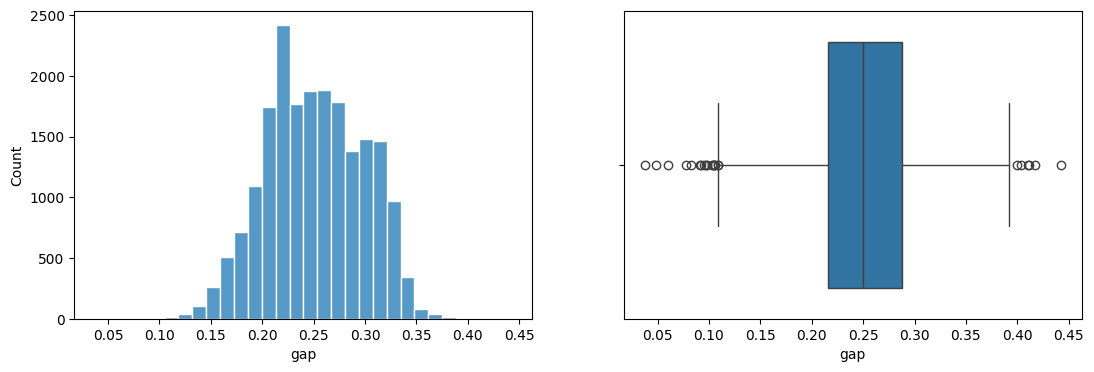

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(df_drop['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=df_drop['gap'], ax=axs[1])
plt.show()

In [8]:
Q1 = df_drop['gap'].quantile(0.25)
Q3 = df_drop['gap'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_drop['gap'] >= Q1 - 1.5 * IQR) & (df_drop['gap'] <= Q3 + 1.5 *IQR)
final_dataset= df_drop.loc[filter]

In [9]:
final_dataset

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,gdb_80215,OC1C2OC(=N)C12C#C,2.30911,1.61767,1.19613,2.3968,71.38,-0.2467,-0.0006,0.2461,1037.3102,0.098952,-436.608941,-436.600959,-436.600015,-436.641349,30.459
1,gdb_38562,C1C2OC3C4C=CC13C24,3.62779,2.04768,1.72903,1.3033,75.21,-0.2190,0.0061,0.2251,817.0529,0.138958,-384.614538,-384.608953,-384.608009,-384.643988,25.205
2,gdb_128434,COC(=N)N1C=NN=C1,4.59666,1.11509,0.90251,4.6009,68.56,-0.2660,-0.0334,0.2325,1220.8171,0.113877,-450.138295,-450.130258,-450.129314,-450.172466,28.251
3,gdb_46047,O=C1CC(CN1)N1CC1,4.51768,0.96556,0.82880,4.0801,76.78,-0.2380,0.0362,0.2742,1365.3572,0.161073,-419.221121,-419.212883,-419.211939,-419.254484,31.115
4,gdb_92629,CC1OC2COCC2O1,2.61928,1.61948,1.55335,1.2958,70.36,-0.2408,0.0839,0.3247,980.1780,0.160888,-460.175337,-460.167671,-460.166727,-460.207765,29.594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gdb_104901,CC1(C)NC1(CO)C#C,1.93991,1.64542,1.04339,2.6551,82.73,-0.2438,0.0245,0.2683,1209.0947,0.168243,-403.095486,-403.085447,-403.084503,-403.129637,38.090
19996,gdb_53282,CC#CC1CN1C(C)C,2.50825,0.95642,0.79844,1.5011,93.14,-0.2190,0.0420,0.2611,1571.3084,0.191229,-367.168954,-367.158033,-367.157088,-367.207375,38.770
19997,gdb_72817,CC12CCN1C(=O)OC2,2.69275,1.69957,1.30104,5.1536,71.11,-0.2533,0.0360,0.2893,1014.2399,0.149087,-439.119901,-439.112091,-439.111146,-439.152396,29.751
19998,gdb_76945,CC1N(C=O)C1(C)C=O,2.83987,1.10021,0.99865,1.6079,75.63,-0.2552,-0.0417,0.2135,1250.7317,0.144013,-439.096281,-439.086363,-439.085419,-439.131265,34.680


In [10]:
df=final_dataset

In [11]:
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,gdb_80215,OC1C2OC(=N)C12C#C,2.30911,1.61767,1.19613,2.3968,71.38,-0.2467,-0.0006,0.2461,1037.3102,0.098952,-436.608941,-436.600959,-436.600015,-436.641349,30.459
1,gdb_38562,C1C2OC3C4C=CC13C24,3.62779,2.04768,1.72903,1.3033,75.21,-0.2190,0.0061,0.2251,817.0529,0.138958,-384.614538,-384.608953,-384.608009,-384.643988,25.205
2,gdb_128434,COC(=N)N1C=NN=C1,4.59666,1.11509,0.90251,4.6009,68.56,-0.2660,-0.0334,0.2325,1220.8171,0.113877,-450.138295,-450.130258,-450.129314,-450.172466,28.251
3,gdb_46047,O=C1CC(CN1)N1CC1,4.51768,0.96556,0.82880,4.0801,76.78,-0.2380,0.0362,0.2742,1365.3572,0.161073,-419.221121,-419.212883,-419.211939,-419.254484,31.115
4,gdb_92629,CC1OC2COCC2O1,2.61928,1.61948,1.55335,1.2958,70.36,-0.2408,0.0839,0.3247,980.1780,0.160888,-460.175337,-460.167671,-460.166727,-460.207765,29.594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gdb_104901,CC1(C)NC1(CO)C#C,1.93991,1.64542,1.04339,2.6551,82.73,-0.2438,0.0245,0.2683,1209.0947,0.168243,-403.095486,-403.085447,-403.084503,-403.129637,38.090
19996,gdb_53282,CC#CC1CN1C(C)C,2.50825,0.95642,0.79844,1.5011,93.14,-0.2190,0.0420,0.2611,1571.3084,0.191229,-367.168954,-367.158033,-367.157088,-367.207375,38.770
19997,gdb_72817,CC12CCN1C(=O)OC2,2.69275,1.69957,1.30104,5.1536,71.11,-0.2533,0.0360,0.2893,1014.2399,0.149087,-439.119901,-439.112091,-439.111146,-439.152396,29.751
19998,gdb_76945,CC1N(C=O)C1(C)C=O,2.83987,1.10021,0.99865,1.6079,75.63,-0.2552,-0.0417,0.2135,1250.7317,0.144013,-439.096281,-439.086363,-439.085419,-439.131265,34.680


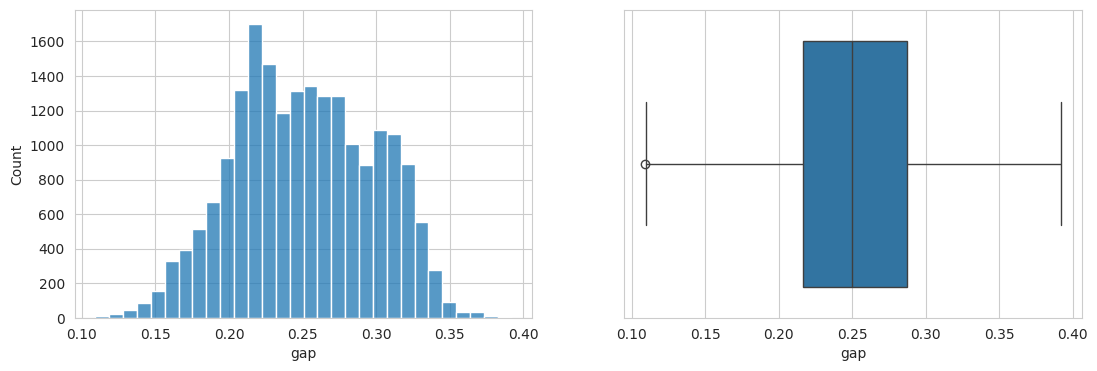

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(final_dataset['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=final_dataset['gap'], ax=axs[1])
plt.show()

Нормализация данных

In [13]:
df.describe()

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
count,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000,19975.000000
mean,3.455804,1.397821,1.119530,2.713266,75.237493,-0.239927,0.011160,0.251087,1190.289645,0.148493,-411.429776,-411.421310,-411.420366,-411.463185,31.585496
std,2.900163,0.554059,0.435727,1.535784,8.087339,0.021811,0.046543,0.047138,278.961766,0.033036,39.835356,39.835146,39.835146,39.835849,4.021029
min,0.000000,0.337120,0.331180,0.000000,14.180000,-0.396300,-0.145200,0.109100,59.989100,0.015951,-620.223531,-620.215144,-620.214200,-620.260025,6.413000
25%,2.556585,1.090940,0.911145,1.585150,70.480000,-0.252400,-0.023600,0.216300,1017.505900,0.125290,-437.891672,-437.883417,-437.882473,-437.924949,28.914000
50%,3.096060,1.370340,1.075220,2.502000,75.550000,-0.241000,0.011800,0.249700,1148.235300,0.148205,-416.855052,-416.847175,-416.846231,-416.888656,31.553000
75%,3.848180,1.652125,1.278180,3.656050,80.490000,-0.228800,0.048500,0.287600,1309.606500,0.171052,-387.047503,-387.038208,-387.037264,-387.081805,34.218500
max,285.488390,38.982300,34.298920,20.024500,143.530000,-0.117700,0.105500,0.392200,3197.568700,0.273944,-114.483613,-114.480746,-114.479802,-114.505268,46.861000


In [15]:
df.columns

Index(['mol_id', 'smiles', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap',
       'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv'],
      dtype='object')

In [19]:
# df_normalized = df.copy()

In [20]:
# scaler = MinMaxScaler()

In [21]:
# # Исключаем 'smiles' из списка столбцов для нормализации
# columns_to_normalize = df_normalized.columns.difference(['gap', 'smiles'])

In [22]:
# # Применяем нормализацию только к выбранным столбцам
# df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

ValueError: could not convert string to float: 'gdb_80215'

In [23]:
scaler = MinMaxScaler()  # Создаем объект MinMaxScaler
normalized_data = scaler.fit_transform(df.iloc[:, 2:])

In [24]:
normalized_data

array([[0.00808828, 0.03313609, 0.02546387, ..., 0.36306446, 0.36305872,
        0.59449169],
       [0.01270731, 0.04426322, 0.04115228, ..., 0.46586942, 0.46587014,
        0.46459652],
       [0.01610104, 0.0201311 , 0.01681978, ..., 0.33631267, 0.33630442,
        0.53990309],
       ...,
       [0.00943208, 0.03525537, 0.02855239, ..., 0.35809914, 0.35809377,
        0.57698774],
       [0.00994741, 0.01974606, 0.01965012, ..., 0.35815001, 0.35813555,
        0.6988479 ],
       [0.00705962, 0.03045917, 0.02186251, ..., 0.53209389, 0.5320728 ,
        0.8232051 ]])

In [25]:
# Создаем новый DataFrame с нормализованными данными, исключая первые два столбца
normalized_df = pd.DataFrame(normalized_data, columns=df.columns[2:])

# Объединяем первые два столбца из исходного DataFrame с нормализованными данными
normalized_df = pd.merge(df[df.columns[:2]], normalized_df, left_index=True, right_index=True)

In [26]:
df=normalized_df

In [27]:
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,gdb_80215,OC1C2OC(=N)C12C#C,0.008088,0.033136,0.025464,0.119693,0.442211,0.536971,0.576785,0.483928,0.311489,0.321718,0.363061,0.363064,0.363064,0.363059,0.594492
1,gdb_38562,C1C2OC3C4C=CC13C24,0.012707,0.044263,0.041152,0.065085,0.471821,0.636396,0.603510,0.409749,0.241289,0.476784,0.465870,0.465869,0.465869,0.465870,0.464597
2,gdb_128434,COC(=N)N1C=NN=C1,0.016101,0.020131,0.016820,0.229764,0.420410,0.467696,0.445951,0.435888,0.369976,0.379568,0.336310,0.336313,0.336313,0.336304,0.539903
3,gdb_46047,O=C1CC(CN1)N1CC1,0.015824,0.016262,0.014650,0.203755,0.483958,0.568198,0.723574,0.583186,0.416043,0.562504,0.397442,0.397446,0.397446,0.397437,0.610710
4,gdb_92629,CC1OC2COCC2O1,0.009175,0.033183,0.035980,0.064711,0.434325,0.558148,0.913841,0.761568,0.293280,0.561787,0.316463,0.316465,0.316465,0.316462,0.573106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,gdb_59757,CC(C)C1CCOC1C,0.006795,0.033854,0.020967,0.132593,0.529957,0.547380,0.676905,0.562345,0.366240,0.590295,0.429327,0.429335,0.429335,0.429320,0.783154
19971,gdb_130137,c1(c(n[nH]c(=O)n1)N)N,0.008786,0.016025,0.013756,0.074963,0.610437,0.636396,0.746709,0.536913,0.481683,0.679391,0.500365,0.500376,0.500376,0.500347,0.799965
19972,gdb_88234,CC1OC1C#CC1CO1,0.009432,0.035255,0.028552,0.257365,0.440124,0.513281,0.722776,0.636524,0.304136,0.516045,0.358096,0.358099,0.358099,0.358094,0.576988
19973,gdb_29725,Cc1ccc(n1C)C#C,0.009947,0.019746,0.019650,0.080297,0.475068,0.506461,0.412844,0.368774,0.379510,0.496378,0.358143,0.358150,0.358150,0.358136,0.698848


In [29]:
normalized_df.to_csv('change_data_task3.csv', index=False)